In [1]:
from google.cloud import bigquery
import pandas as pd
from viztools.vizio import storage
import os
from matplotlib import pyplot as plt
import matplotlib as mpl

In [ ]:
query = '''SELECT * FROM `telemetry.telemetry` WHERE DeviceID = "Rose Park" AND Timestamp BETWEEN "2022-01-01" AND "2022-09-01" ORDER BY Timestamp ASC'''
res = bigquery.Client().query(query).result()
df = pd.DataFrame([dict(i) for i in res])
df = df.set_index('Timestamp')
df = df[df['PM2_5'] > 0]
df.index = pd.to_datetime(df.index)
df = df[~df.index.duplicated(keep='first')]


In [ ]:
pm = df[['PM2_5']].resample('1H').mean()
# pm.loc['2022-06-16 00:00':'2022-06-22 06:00'].plot()
pm.plot()

In [ ]:
snapshot = storage.read_region_snapshot(region='slc_ut',
                                        timestamp='2022-01-18 18:00:00')
print(snapshot.vals.max())
plt.figure()
plt.imshow(snapshot.vals, vmin=0, vmax=60)
plt.colorbar()

In [2]:
start = '2022-01-10'
end = '2022-01-12'
dr = f'/Users/tombo/Movies/animation_slc_{start}_{end}'

if not os.path.exists(dr):
    os.makedirs(dr)

tss = pd.date_range(start, end, freq='15min')
for ts in tss:
    fn = f'{dr}/{str(ts).replace(":", ".")}.png'
    if os.path.exists(fn):
        continue
    
    try:
        snapshot = storage.read_region_snapshot(region='slc_ut',
                                                timestamp=str(ts))
    except:
        print(f'*** No data for {str(ts)}')
        continue

    plt.figure()
    plt.imshow(snapshot.vals, vmin=0, vmax=100)
    plt.colorbar()
    plt.savefig(fn, format='png')
    plt.close('all')
    print(fn)
print('Done...')

*** No data for 2022-01-10 11:00:00
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 20.30.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 20.45.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 21.00.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 21.15.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 21.30.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 21.45.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 22.00.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 22.15.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 22.30.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 22.45.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 23.00.00.png
/Users/tombo/Movies/animation_slc_2022-01-10_2022-01-12/2022-01-11 23.15.00.png
/Use

In [7]:
query = '''
SELECT 
  TIMESTAMP_SECONDS(60*60*6 * DIV(UNIX_SECONDS(timestamp), 60*60*6)) timekey,
  STDDEV(PM2_5) PM_VAR,
  STDDEV_POP(PM2_5) PM_POPVAR,
  COUNT(*) AS COUNT,
  AVG(PM2_5) PM_AVG
FROM `telemetry.telemetry`
where label="slc_ut" and Timestamp BETWEEN "2021-01-01" AND "2021-09-01"
AND PM2_5 >= 0 AND PM2_5 < 1000
GROUP BY timekey order by timekey desc
'''
res = bigquery.Client().query(query).result()
df2 = pd.DataFrame([dict(i) for i in res])
df2.set_index('timekey', inplace=True)
df2.index = pd.to_datetime(df2.index)

<AxesSubplot:xlabel='timekey'>

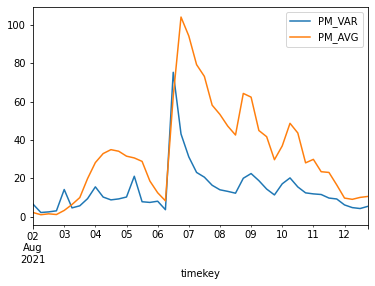

In [12]:
df2.loc['2021-08-02':'2021-08-12', ['PM_VAR', 'PM_AVG']].plot()

<AxesSubplot:xlabel='timekey'>

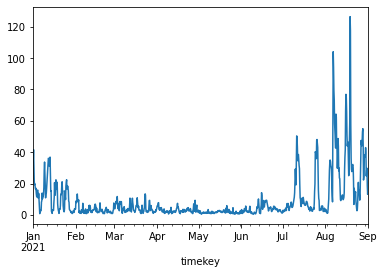

In [8]:
df2['PM_AVG'].plot()

<AxesSubplot:xlabel='timekey'>

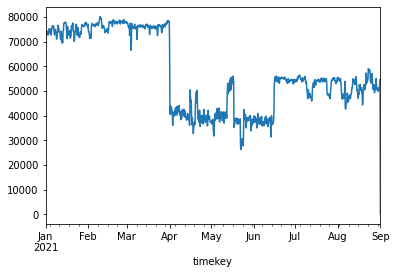

In [9]:
df2['COUNT'].plot()